In [7]:
import pandas as pd
from pythainlp import word_tokenize

In [8]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [9]:
train_df.columns

Index(['ID', 'set', 'question', 'answer', 'score'], dtype='object')

In [10]:
train_df["question"].unique()

array(['Hamtube เป็นแพลตฟอร์มดูวีดีโอออนไลน์ ที่อนุญาตให้ผู้ใช้อัปโหลด แชร์ และดูวิดีโอได้ แฮมทาโร่ เป็นหัวหน้าทีมการตลาดของ Hamtube และเขาต้องการทราบว่าการย้ายตำแหน่งของโฆษณาจะช่วยเพิ่มยอดขาย (ผู้ใช้คลิกโฆษณามากขึ้น) หรือไม่ ดังนั้นเขาตัดสินใจที่จะดำเนินการทดลอง A/B testing. granularity ควรเป็นอะไร และความยาวของ attribution period ควรเป็นเท่าไหร่ จงอธิบายเหตุผล',
       'Hamtube เป็นแพลตฟอร์มดูวีดีโอออนไลน์ ที่อนุญาตให้ผู้ใช้อัปโหลด แชร์ และดูวิดีโอได้ แฮมทาโร่ เป็นหัวหน้าทีมการตลาดของ Hamtube และเขาต้องการทราบว่าการย้ายตำแหน่งของโฆษณาจะช่วยเพิ่มยอดขาย (ผู้ใช้คลิกโฆษณามากขึ้น) หรือไม่ ดังนั้นเขาตัดสินใจที่จะดำเนินการทดลอง A/B testing. แฮมทาโร่เลือกที่จะใช้ binomial distribution เพื่อแทน distribution ของการทำ A/B testing ในครั้งนี้ คุณเห็นด้วยหรือไม่เห็นด้วยกับแฮมทาโร่ เพราะเหตุใด',
       'Hamtube เป็นแพลตฟอร์มดูวีดีโอออนไลน์ ที่อนุญาตให้ผู้ใช้อัปโหลด แชร์ และดูวิดีโอได้ แฮมทาโร่ เป็นหัวหน้าทีมการตลาดของ Hamtube และเขาต้องการทราบว่าการย้ายตำแหน่งของโฆษณาจะช่วยเพิ่มยอดขาย (ผู้ใช้คลิกโฆ

# Data distribution

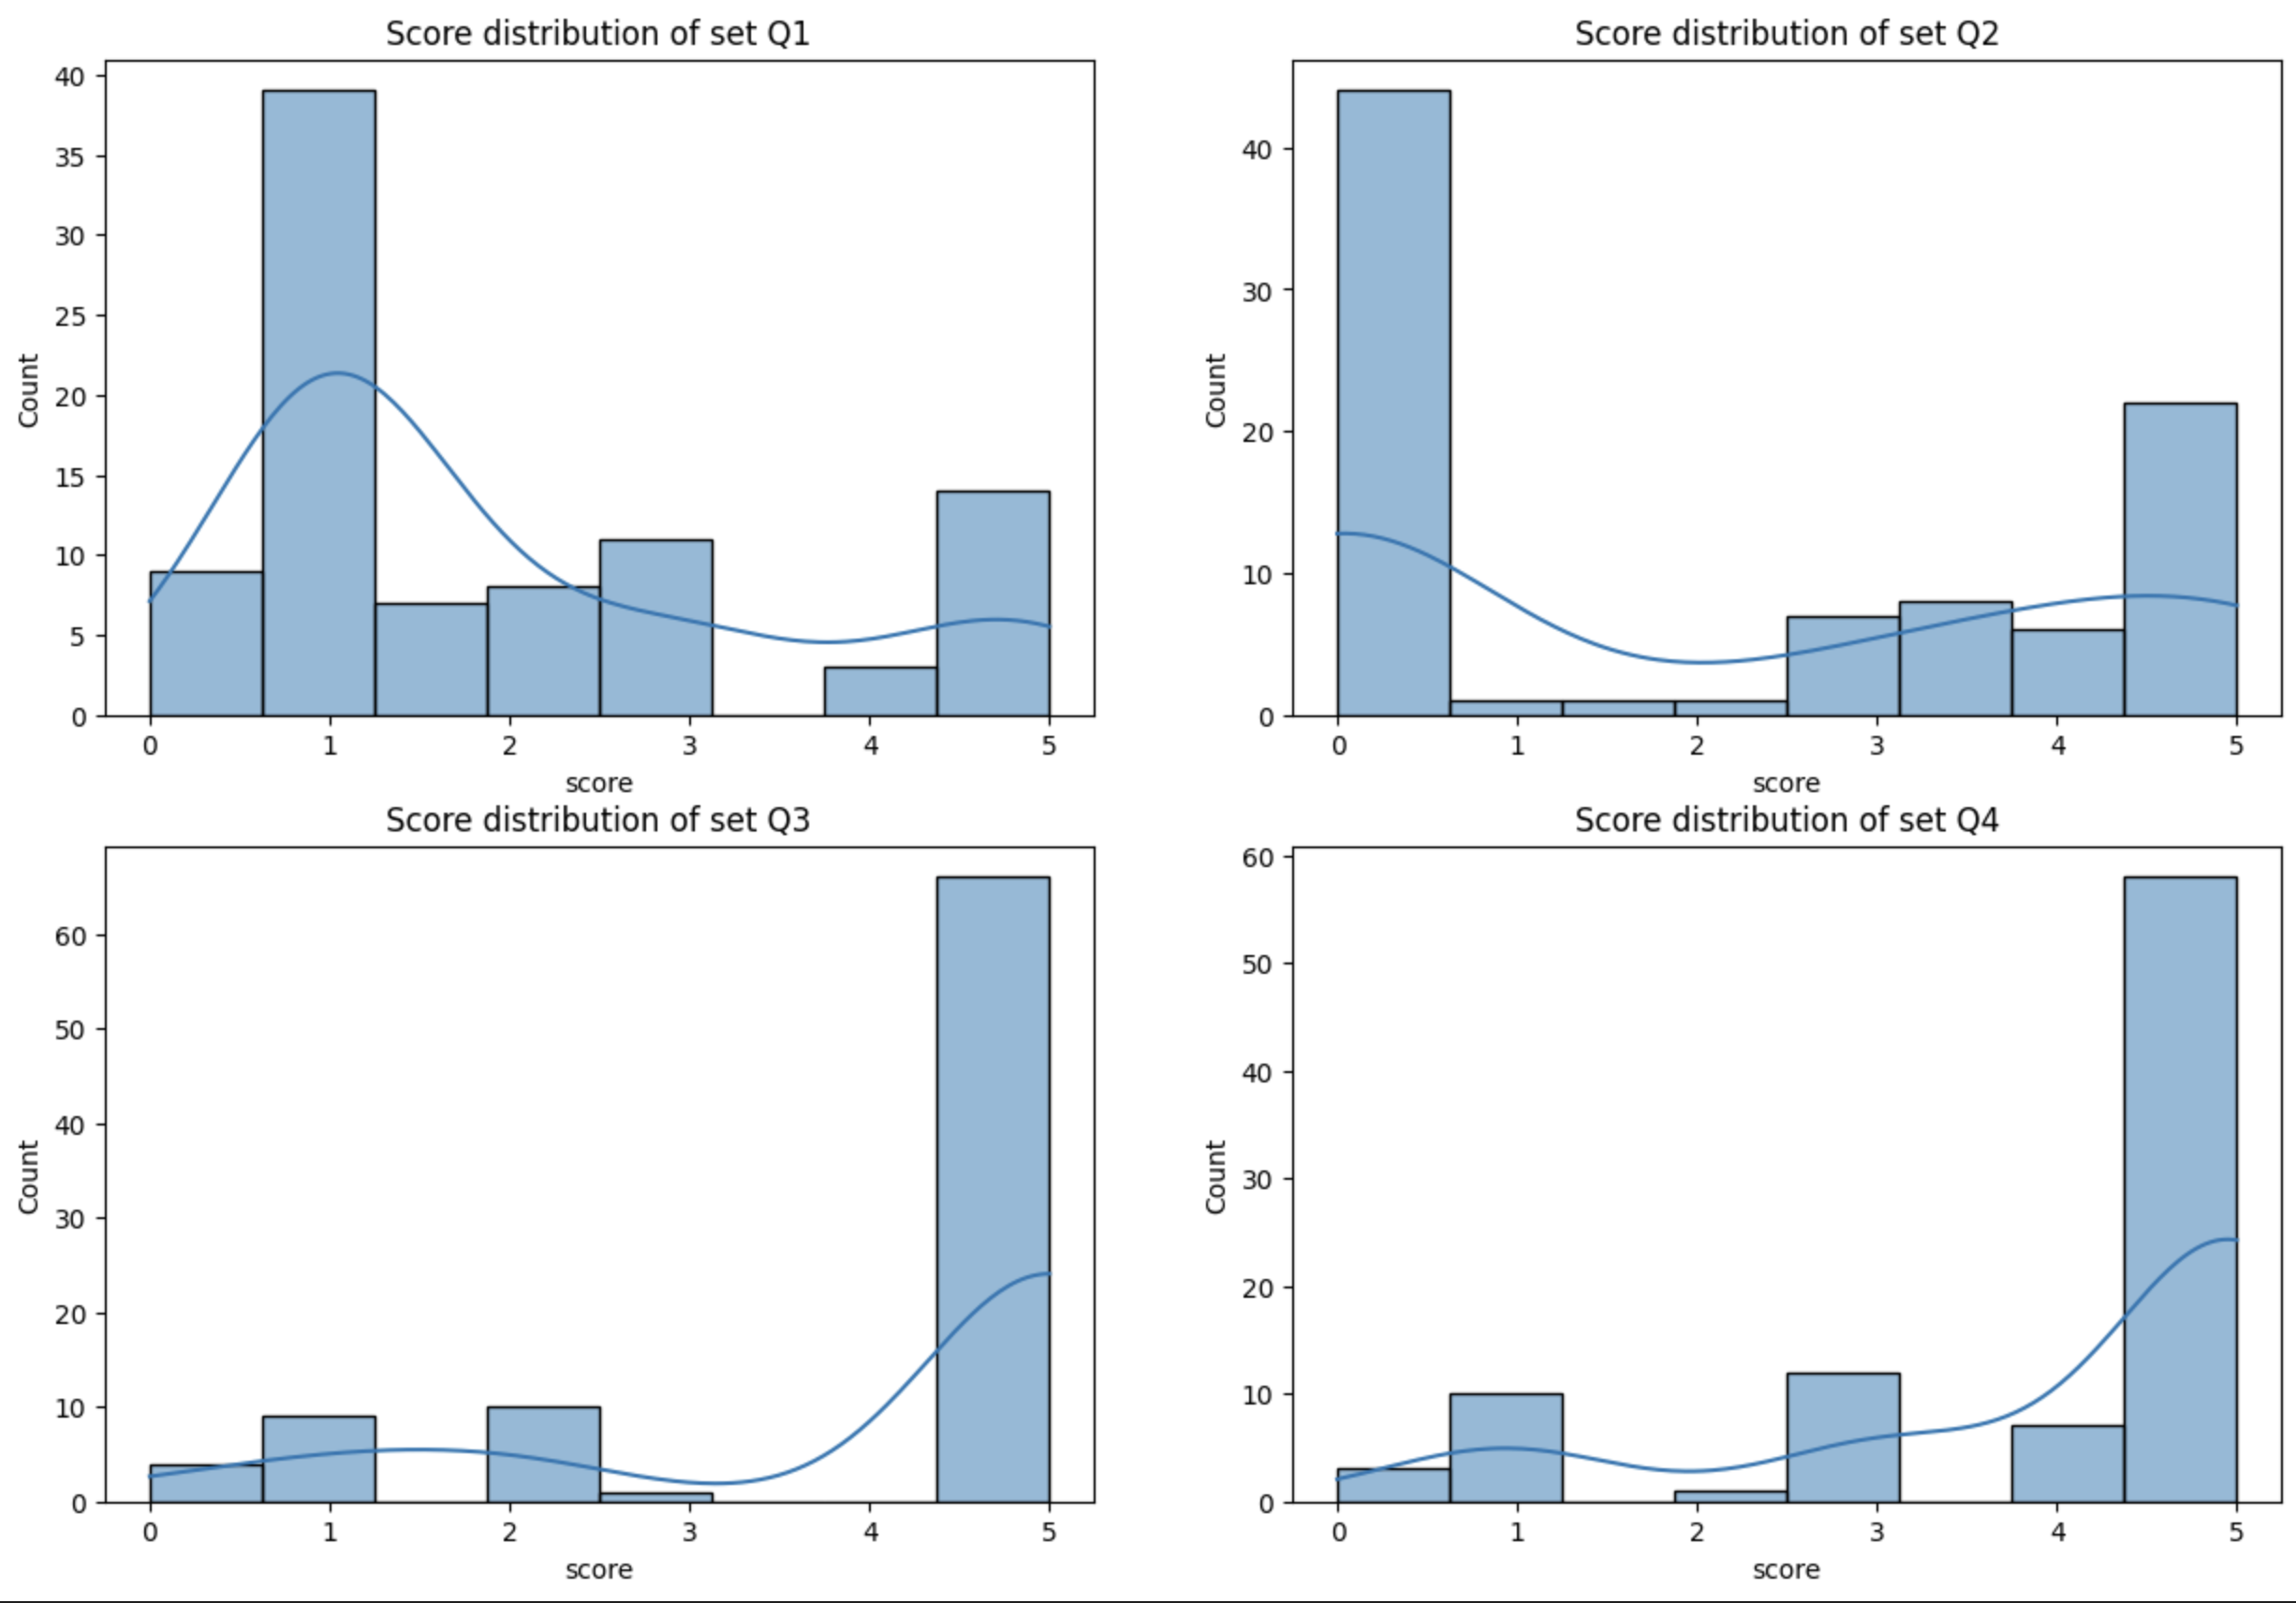

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

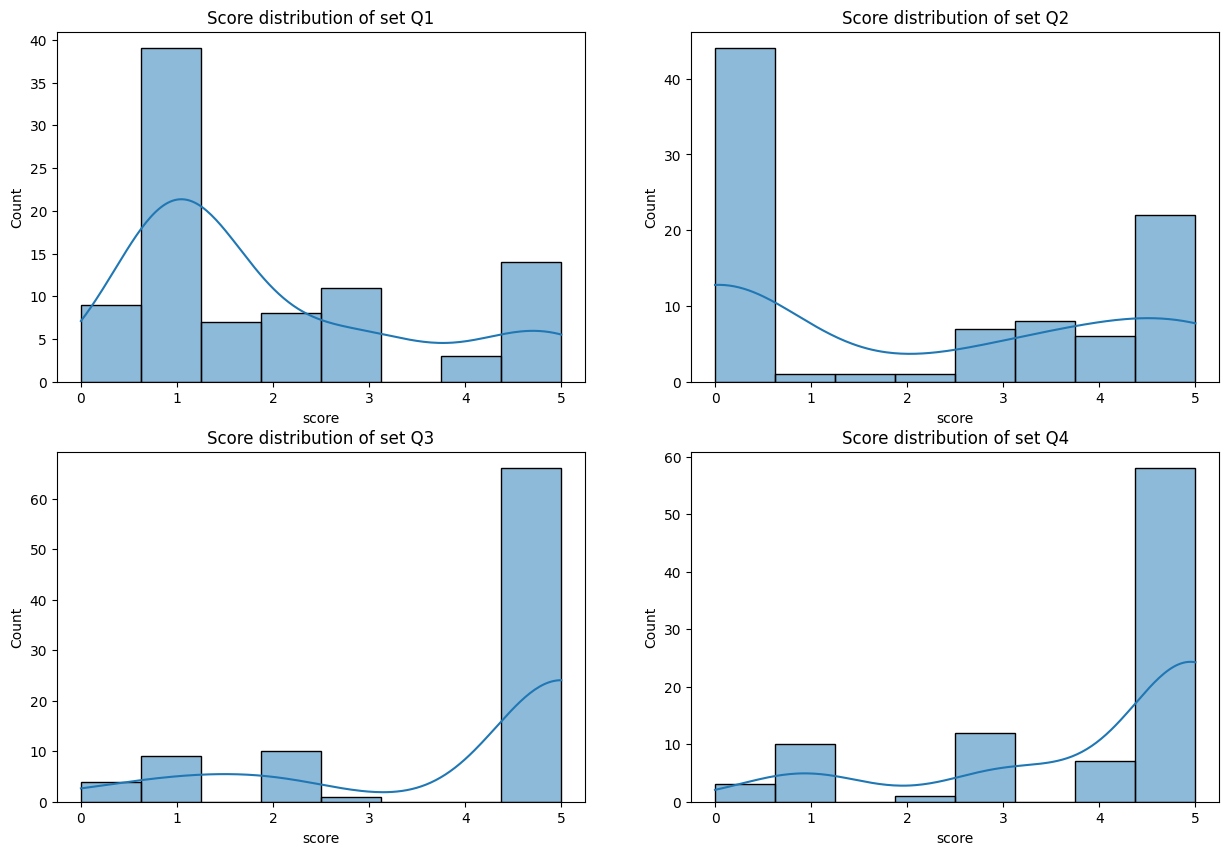

In [12]:
# Plot score distribution by 'set' column
plt.figure(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[train_df["set"] == f"Q{i}"]["score"], kde=True)
    plt.title(f"Score distribution of set Q{i}")
plt.show()

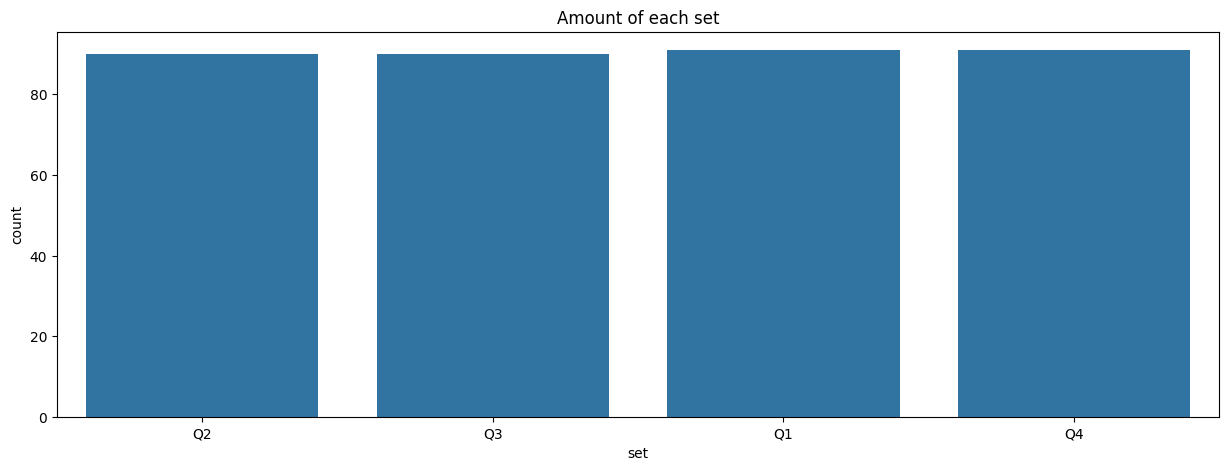

In [14]:
# Plot amount of each set
plt.figure(figsize=(15, 5))
sns.countplot(data=train_df, x="set")
plt.title("Amount of each set")
plt.show()

# Find OOV

```bash
- Q1 - 19.45% of the words in the test set are OOV.
- Q2 - 21.39% of the words in the test set are OOV.
- Q3 - 26.81% of the words in the test set are OOV.
- Q4 - 25.00% of the words in the test set are OOV.
```

We shouldn't train the encoder ourself because there's too much OOV in the test set. which the encoder can't handle.

In [ ]:
from collections import defaultdict
from tqdm import tqdm

In [ ]:
train_words_by_question = defaultdict(set)
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    words = word_tokenize(row["answer"])
    train_words_by_question[row["set"]].update(words)

100%|██████████| 362/362 [00:00<00:00, 2761.99it/s]


In [ ]:
test_words_by_question = defaultdict(set)
for i, row in tqdm(test_df.iterrows(), total=len(test_df)):
    words = word_tokenize(row["answer"])
    test_words_by_question[row["set"]].update(words)

100%|██████████| 90/90 [00:00<00:00, 2953.34it/s]


In [ ]:
for set_id in train_df["set"].unique():
    print(
        f"Set {set_id} train words: {len(train_words_by_question[set_id])}, test words: {len(test_words_by_question[set_id])}"
    )
    print(
        f"\t test - train words: {len(test_words_by_question[set_id] - train_words_by_question[set_id])} ({len(test_words_by_question[set_id] - train_words_by_question[set_id]) / len(test_words_by_question[set_id]) * 100:.2f}%)"
    )
    print("\t", ", ".join(test_words_by_question[set_id] - train_words_by_question[set_id]))

Set Q2 train words: 995, test words: 416
	 test - train words: 89 (21.39%)
	 ที่เกิด, ชอง, สาเหตุ, หน้าจอ, product, wissa, อีกด้วย, แสดงผล, เจริญเติบโต, ประกอบ, เม่น, (impressions), ณ, กลาง, เป็นหนึ่ง, น., เรียก, (average, ป้องกัน, แฟลต, =1, ยำ, แก่, ค, หมายความว่า, Periods, length, ตัวหาร, journey, when, ขณะนั้น, One-day, ซ้า, viewer, )/(#cookies, /#, ขาดหาย, หน้าใหม่, สมดุล, เนื่่อง, view, คนเดียว, ตรวจ, ยิ่ง, ยกเว้น, ถึงว่า, พักผ่อน, /Sessions, วาร, hours, หมดเวลา, เน้น, ตามเวลา, ตรงไปตรงมา, แนวโน้ม, ผุ้, โซเชียล, เนื่องมาจาก, งา, จับ, ก่อน, การประมาณ, คล้าย, 60, เท่าไร, นว, สอง, youtube, ฟอร์ม, เปลี่ยนเป็น, ชิ้น, จำเป็น, minutes, Sessions, new, ชั่วคราว, 26, อ่าน, มีเดีย, engagement, หน่วย, นัก, season, cycle, %, วันทำงาน, เท่ากับ, เเล้ว, รายงาน
Set Q3 train words: 631, test words: 317
	 test - train words: 85 (26.81%)
	 experiments, การประมวลผลข้อมูล, รวม, can, ชม, หำ, ยาก, relevant, มาหา, แย, เอา, average, seen, เปลี่ยน, reels, due, เชื่อถือได้, just, approach, กราฟ, นาที, โฆษ, a